---

<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=15>
MOVIES DATASET ANALYSIS
</font>
</h1>


<h1 align=center style="line-height:200%;font-family:vazir">
<font face="vazir" size=3>
 Published by: Zahra Rabiee

 </font>
</h1>

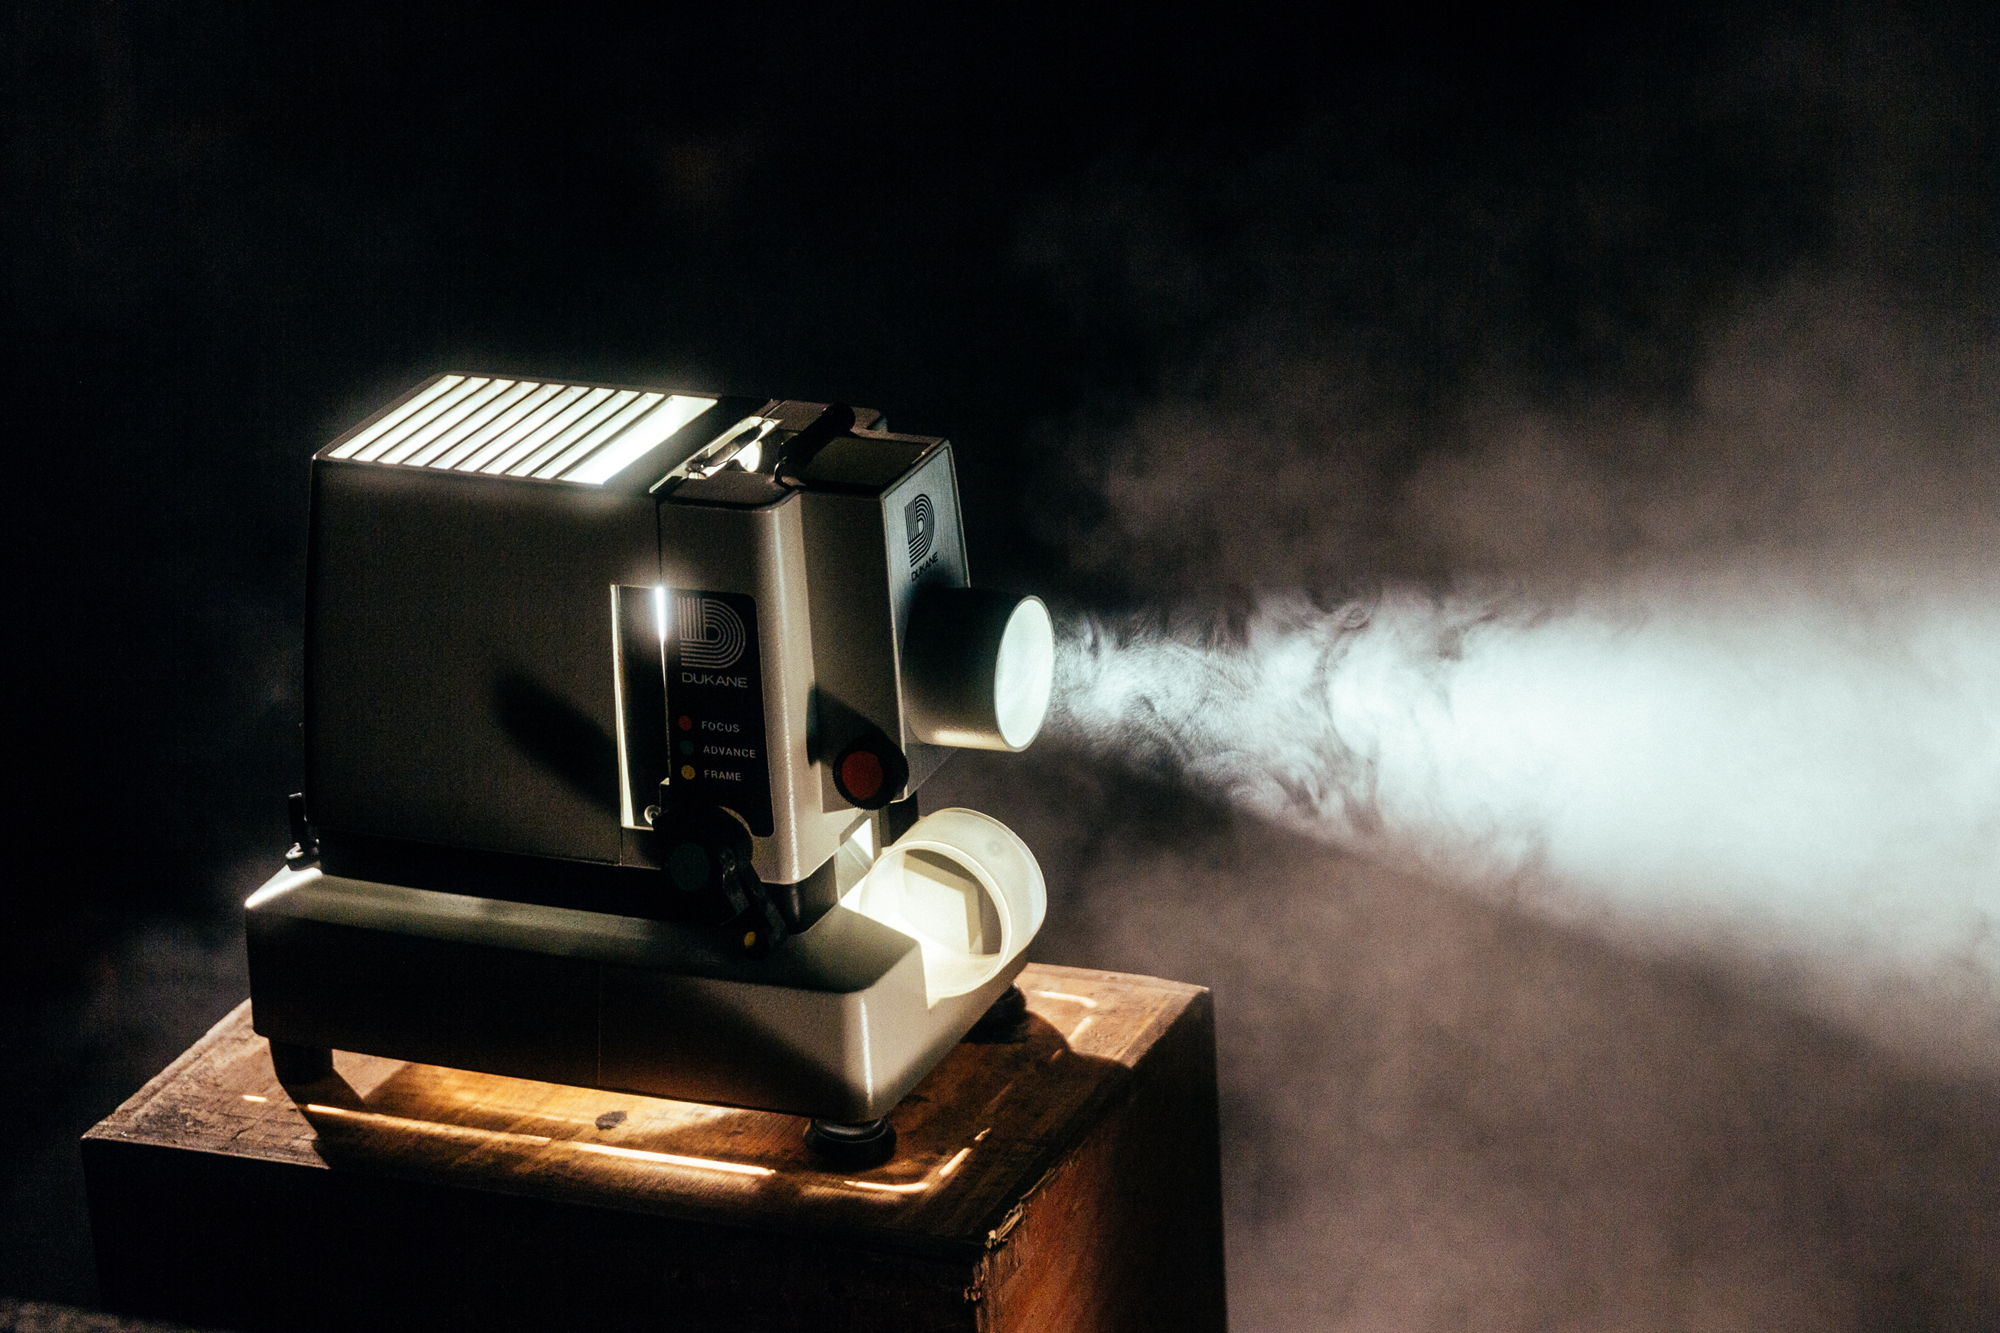

By using extensive IMDB data and data analysis techniques, we seek answers to questions about the factors influencing film commercial success, such as sales figures, audience preferences in different genres, and the relationship between film characteristics and critics' ratings. Our ultimate goal is to provide a thorough and data-driven analysis of the film industry.

---

# Table of Contents
* [Data Extraction](#chapter1)

* [Data Prepration](#chapter2)

* [Data Analytics and Visualisation](#chapter3)


---

## 1. Data Extraction <a class="anchor" id="chapter1"></a>



### 1.1.Overview <a id="section_1_1"></a>
I was recently hired as an Data Analyst at HBO. For my first project, I was handed a movie data set  between 1916 till 2016 from IMDB website to analyze and advise the corporation on their future movies.

**The objectives of this analysis includes:**

- 

### 1.2. Data Description <a id="section_1_2"></a>
The data was sourced from [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data) and [TMDB](https://www.themoviedb.org/).

| Column name | Description |
|---|---|
index|	The index of the dataframe	
budget|	The budget of the movie
genres|	The genres of the movie
homepage|	The homepage URL of the movie
id|	The unique identifier of the movie
keywords|	The keywords associated with the movie
original_language|	The original language of the movie
original_title|	The original title of the movie	object
overview|	A brief overview or summary of the movie
popularity|	The popularity score of the movie
production_companies|	The production companies involved in making the movie
production_countries|	The countries where the movie was produced
release_date|	The release date of the movie	
revenue|	The revenue generated by the movie
runtime|	The duration of the movie in minutes
spoken_languages|	The languages spoken in the movie
status|	The status of the movie (e.g., Released, Rumored)
tagline|	The tagline or slogan of the movie	object
title|	The title of the movie
vote_average|	The average rating given to the movie by users
vote_count|	The number of votes received by the movie
cast|	The cast members of the movie
crew|	The crew members involved in making the movie
director|	The director of the movie



### 1.3. Initial Data Exploration <a id="section_1_3"></a>

First, we import the essential Python packages needed for exploring and analyzing our dataset. Then, we conduct an initial exploration to identify potential issues, such as missing values and other inconsistencies with our dataset. This preliminary step helps us become acquainted with our data and enhances our understanding of its structure and content.

In [72]:
# Libraries that I need during analysis.

#Data manipulation
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats import spearmanr

# for encoding data
import codecs  


In [73]:
#Importing Dataset
main_df= pd.read_csv('movie_dataset.csv')

In [74]:
#overview of main dataset
main_df.head()

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  ... runtime  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577  ...   162.0   
1  Captain Barbossa, long believed to be dead, ha...  139.082615  ...   169.0   
2  A cryptic message from Bond’s past sends him o...  107.376788  ...   148.0   
3  Following the death of District Attorney Harve...  112.312950  ...   165.0   
4  John Carter is a war-weary, former military ca...   43.926995  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski  
2  [{'name': 'Thomas Newman', 'gender': 2, 'depar...         Sam Mendes  
3  [{'name': 'Hans Zimmer', 'gender': 2, 'departm...  Christopher Nolan  
4  [{'name': 'Andrew Stanton', 'gender': 2, 'depa...     Andrew Stanton  

[5 rows x 24 columns]

In [75]:
# A Quick information about the dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [76]:
# Dataset dimension
main_df.shape  

(4803, 24)

In [77]:
#Data type of each column
main_df.dtypes  

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object

In [78]:
# Number of each data types in total columns
main_df.dtypes.value_counts()  

object     16
int64       5
float64     3
Name: count, dtype: int64

In [79]:
# Description of the data in the DataFrame
main_df.describe()

index        budget             id   popularity       revenue  \
count  4803.000000  4.803000e+03    4803.000000  4803.000000  4.803000e+03   
mean   2401.000000  2.904504e+07   57165.484281    21.492301  8.226064e+07   
std    1386.651002  4.072239e+07   88694.614033    31.816650  1.628571e+08   
min       0.000000  0.000000e+00       5.000000     0.000000  0.000000e+00   
25%    1200.500000  7.900000e+05    9014.500000     4.668070  0.000000e+00   
50%    2401.000000  1.500000e+07   14629.000000    12.921594  1.917000e+07   
75%    3601.500000  4.000000e+07   58610.500000    28.313505  9.291719e+07   
max    4802.000000  3.800000e+08  459488.000000   875.581305  2.787965e+09   

           runtime  vote_average    vote_count  
count  4801.000000   4803.000000   4803.000000  
mean    106.875859      6.092172    690.217989  
std      22.611935      1.194612   1234.585891  
min       0.000000      0.000000      0.000000  
25%      94.000000      5.600000     54.000000  
50%     103.000000      6.200000    235.000000  
75%     118.000000      6.800000    737.000000  
max     338.000000     10.000000  13752.000000

In [80]:
# Finding the number of missing values of columns

total_missing=main_df.isnull().sum().sort_values(ascending=False)
total_missing=total_missing[total_missing>0]
total_missing=pd.DataFrame(total_missing) 
#----------------------------------------------------------------------------------------
# Finding the Ratio of missing values of columns
total_missing['Ratio']=round(total_missing/len(main_df)*100,2)

#----------------------------------------------------------------------------------------
total_missing.columns=['Number','Ratio'] #Changing the name of columns
total_missing

Number  Ratio
homepage        3091  64.36
tagline          844  17.57
keywords         412   8.58
cast              43   0.90
director          30   0.62
genres            28   0.58
overview           3   0.06
runtime            2   0.04
release_date       1   0.02

---

## 2. Data Prepration  <a id="chapter2"></a>

In [81]:
# Building a copy of main dataframe

df=main_df.copy()

### 2.1 Removing unusable columns <a id="section_2_1"></a>

The'status' column has 3 values: Released, Rumored, and Post Production. Since we only want to analyze released movies, we will remove others.


In [82]:
df['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

In [83]:
# Droping

df.drop(df[df['status']=='Post Production'].index,inplace=True)
df.drop(df[df['status']=='Rumored'].index,inplace=True)

In [84]:
# Removing unusable columns

df=df.drop(columns=['homepage','overview','keywords','tagline','index','cast','crew', 'status'])

In the genres column, the words science fiction are separate, so we combine them as sci-fi.

In [85]:
# science fiction to sci-fi

df['genres']=df['genres'].str.replace('science fiction','sci-fi')

In [86]:
# Convert string data to lower letters

df['genres']=df['genres'].str.lower()
df['production_companies']=df['production_companies'].str.lower()
df['spoken_languages']=df['spoken_languages'].str.lower()
df['title']=df['title'].str.lower()
df['director']=df['director'].str.lower()
df['original_language']=df['original_language'].str.lower()

### 2.3 converting Format <a id="section_2_2"></a>
We convert the 'release_date' column to date format. Then we extract two columns named 'release_Year' and 'release_month' from the date feature and add them to the dataframe.


In [87]:
# convert to date format
df['release_date']=pd.to_datetime(df['release_date'])

#extract two columns
df['release_Year']=df['release_date'].dt.year
df['release_month']=df['release_date'].dt.month

# Droping 'release_date' column
df.drop(columns='release_date',inplace=True)


### 2.2 Null Values <a id="section_2_2"></a>


The 'production_companies', 'production_countries', and'spoken_languages' columns have null values in the form of [ ]. These values aren't so much, so we remove these rows.

In [88]:
df[df['production_companies']=='[]'].shape

(345, 17)

In [89]:
df.drop(index=df[df['production_companies']=='[]'].index,inplace=True)
df.drop(index=df[df['production_countries']=='[]'].index,inplace=True)
df.drop(index=df[df['spoken_languages']=='[]'].index,inplace=True)

The 'runtime' and 'director' columns have 4 empty values in total; we can remove them.

In [90]:
df.dropna(subset=['runtime'],inplace=True)
df.dropna(subset=['director'],inplace=True)

#Checking
df.isnull().sum().sort_values(ascending=False) 

budget                  0
genres                  0
id                      0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
director                0
release_Year            0
release_month           0
dtype: int64

### 2.4 Zero Values <a id="section_2_4"></a>

In the numerical columns, so much data have zero values.

In [91]:
df.shape

(4407, 17)

In [92]:
df[(df['revenue'] == 0) | (df['budget'] == 0) | (df['popularity'] == 0) | (df['runtime'] == 0) |(df['vote_average'] == 0) | (df['vote_count'] == 0)].shape

(1227, 17)

Text(0.5, 0, 'Distribution of Runtime column values')

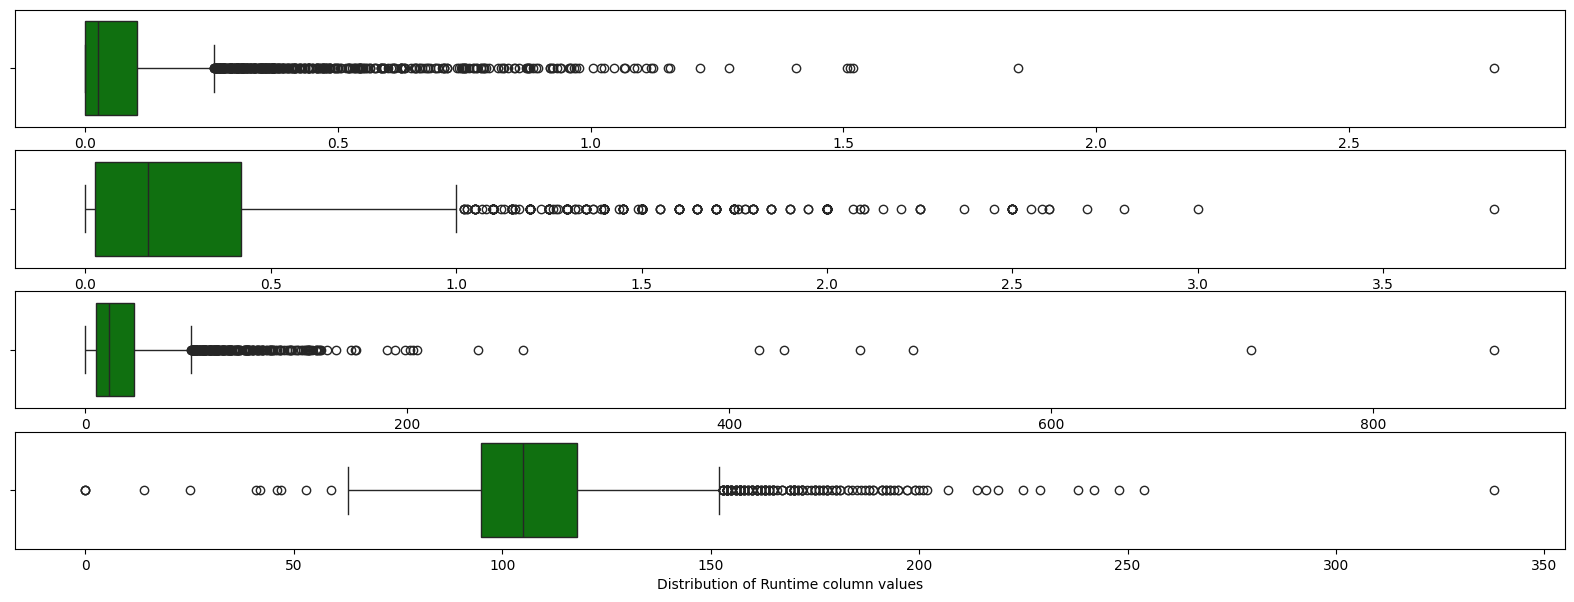

In [93]:
# Distribution of important numerical columns.

fig, axes = plt.subplots(4, 1, figsize=(20,7))

sns.boxplot(x = 'revenue', data = df,ax=axes[0],color='green')
axes[0].set_xlabel('Distribution of Revenue column values')

sns.boxplot(x = 'budget', data = df,ax=axes[1],color='green')
axes[1].set_xlabel('Distribution of Budget column values')

sns.boxplot(x = 'popularity', data = df,ax=axes[2],color='green')
axes[2].set_xlabel('Distribution of Popularity column values')

sns.boxplot(x = 'runtime', data = df,ax=axes[3],color='green')
axes[3].set_xlabel('Distribution of Runtime column values')


In [94]:
df[df['vote_average']==0].shape

(20, 17)

In [95]:
df[df['runtime']==0].shape

(3, 17)

In the 'runtime' column, we have just 3 rows that have zero values, so we can remove them. Also, the rows with 0 'vote_average' have 0 'vote_count' (about 20 rows), which means that no one votes for them, so we can ignore them.

In [96]:
df.drop(index=df[df['runtime']==0].index,inplace=True)

We assume that these zero values are actually missing values, so we replace them with Nan.

In [97]:
# Rplacing zero values ​​in numerical columns to Nan.

def convert_zeros_to_nan(df, column_name):
    df[column_name] = np.where(df[column_name] == 0, np.nan, df[column_name])
    return df

convert_zeros_to_nan(df,'revenue')
convert_zeros_to_nan(df,'budget');
convert_zeros_to_nan(df,'popularity');


In [98]:
total_null=df.isnull().sum()/len(df)*100
total_null=total_null[total_null>0]
total_null

budget     16.961853
revenue    24.682107
dtype: float64

Text(50.722222222222214, 0.5, 'rows')

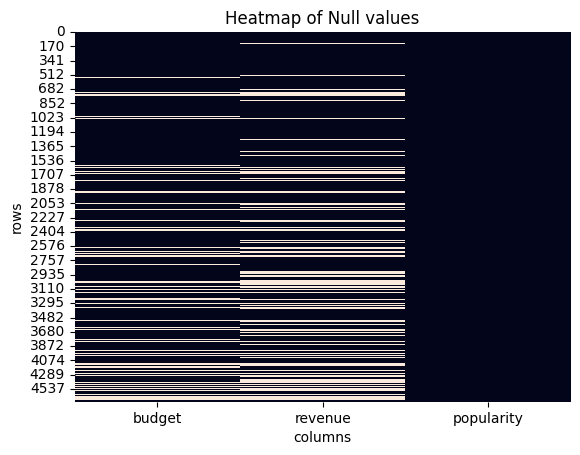

In [99]:
fig , ax = plt.subplots()
sns.heatmap(df[['budget', 'revenue', 'popularity']].isnull(), cbar=False)

ax.set_title("Heatmap of Null values")
ax.set_xlabel("columns")
ax.set_ylabel("rows")

At this point, we cannot fill in an exact replacement for the zero values ​​in the runtime , revenue , and budget columns because they are very important in our analysis and making inaccurate changes to the data frame would makae bias.
So for now, we store them in a separate data frame and remove them from the df .

In [100]:
missing_values_df=df[(df['revenue'].isnull()) ]  # New dataset for deleted
df.dropna(subset='revenue',axis=0,inplace=True)  # Drop Null values from dataset

---

### 2.5 Outliers <a id="section_2_5"></a>

Some of the outliers happened because of missing 0, we can fix them by multiplying by 1000,000.

In [101]:
# multiplying by 100,000

df['revenue'][(df['revenue']<100) & (df['revenue']!= np.nan)]=df['revenue'][(df['revenue']<100) & (df['revenue']!= np.nan)]*1000000 
df['budget'][(df['budget']<100)& (df['budget']!=np.nan)]=df['budget'][(df['budget']<100)&  (df['budget']!=np.nan)]*1000000 

C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\1587034245.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['revenue'][(df['revenue']<100) & (df['revenue']!= np.nan)]=df['revenue'][(df['revenue']<100) & (df['revenue']!= np.nan)

C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\150387858.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend()


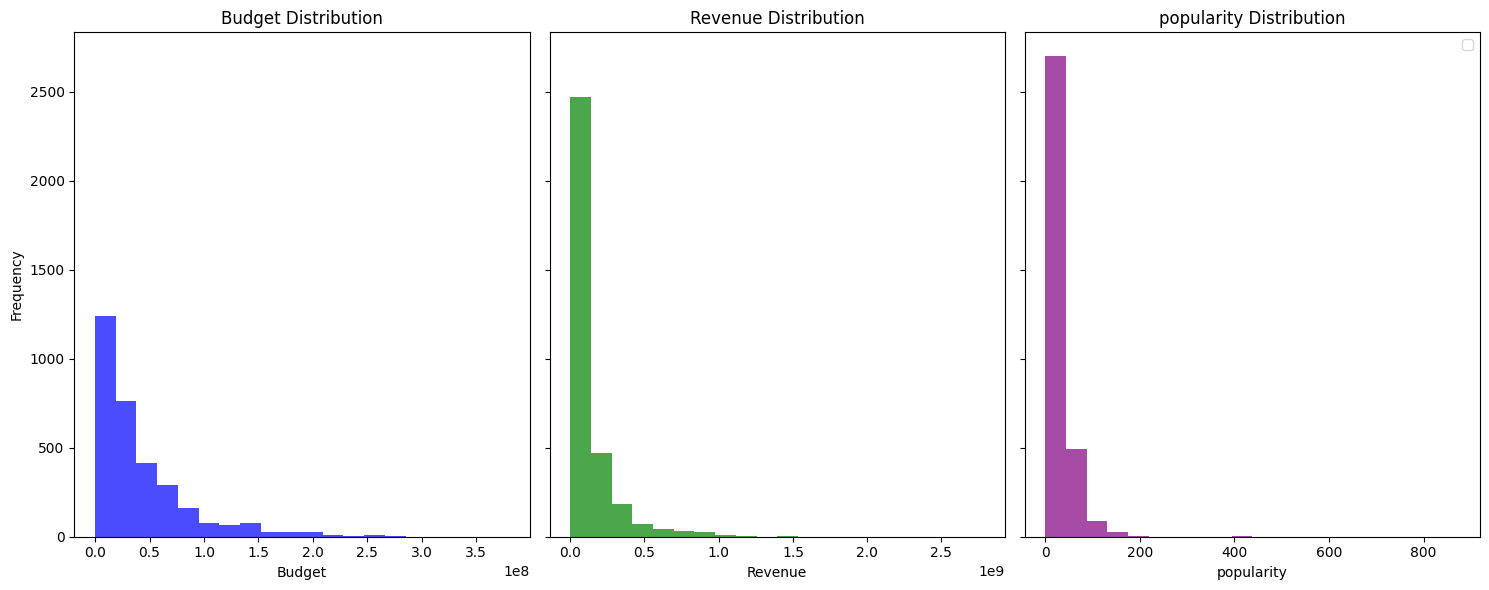

In [102]:
import matplotlib.pyplot as plt

# Plot histograms for budget, revenue, and their log values for comparison
fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Plot original budget distribution
axs[0].hist(df['budget'].dropna(), bins=20, color='blue', alpha=0.7)
axs[0].set_title('Budget Distribution')
axs[0].set_xlabel('Budget')
axs[0].set_ylabel('Frequency')

# Plot original revenue distribution
axs[1].hist(df['revenue'].dropna(), bins=20, color='green', alpha=0.7)
axs[1].set_title('Revenue Distribution')
axs[1].set_xlabel('Revenue')

# Plot log-transformed budget and revenue for better visualization of ranges
import numpy as np
#log_budget = np.log1p(df['budget'].dropna())
#log_revenue = np.log1p(df['revenue'].dropna())
axs[2].hist(df['popularity'].dropna(), bins=20, color='purple', alpha=0.7,  histtype='stepfilled')
axs[2].set_title('popularity Distribution')
axs[2].set_xlabel('popularity')
axs[2].legend()

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Popularity Before Droping')

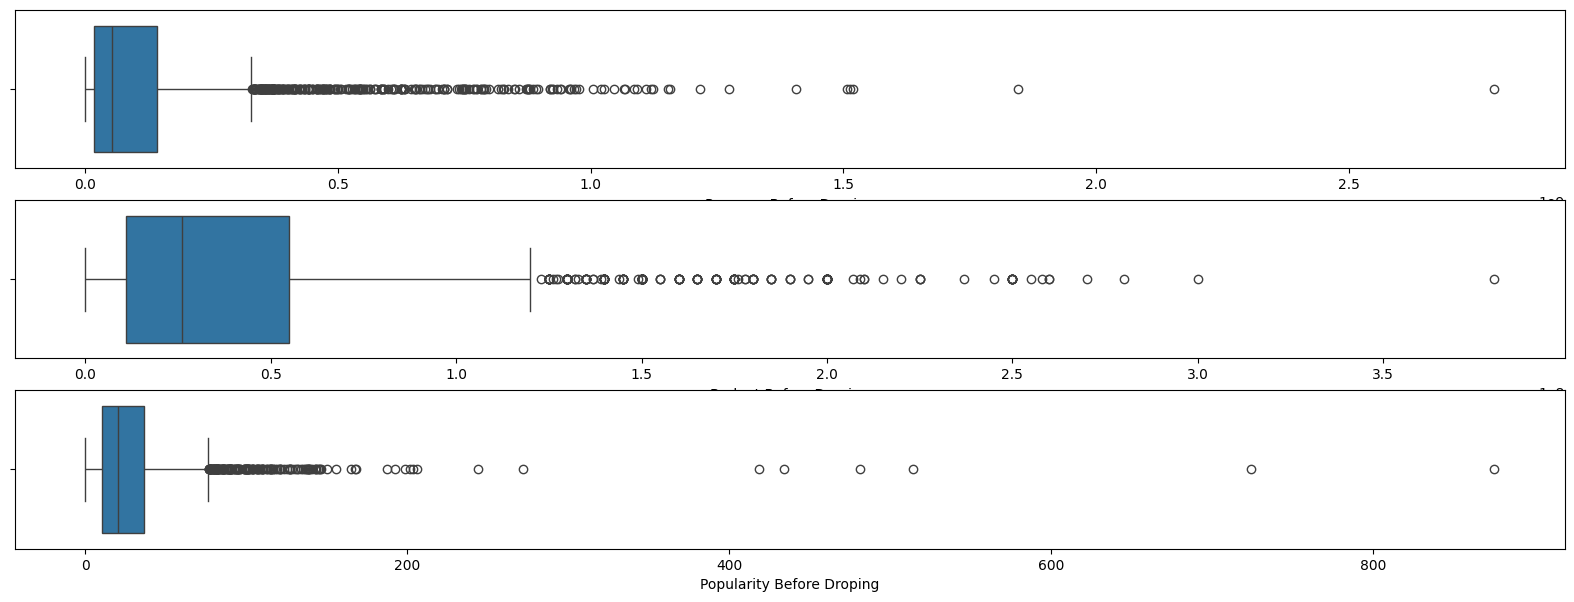

In [103]:
fig, axes = plt.subplots(3, 1, figsize=(20,7))

sns.boxplot(x = 'revenue', data = df,ax=axes[0])
axes[0].set_xlabel('Revenue Before Droping')

sns.boxplot(x = 'budget', data = df,ax=axes[1])
axes[1].set_xlabel('Budget Before Droping')

sns.boxplot(x = 'popularity', data = df,ax=axes[2])
axes[2].set_xlabel('Popularity Before Droping')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 ستون های popularity و budget  برای من بسیار اهمیت دارد بنابراین با توجه به روش‌های موجود برای حذف داده‌های پرت ترجیح می‌دهم داده‌های این ستون‌ها را حذف نکنم
    </font>
</p>




<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 اما ستون popularity اهمیت چندانی ندارد و داده‌های پرت آن کم است. برای همین با روشIQR داده‌های پرت را حذف می‌کنم.
    </font>
</p>


In [104]:
df.shape

(3317, 17)

In [105]:
'''

import matplotlib.pyplot as plt

df['revenue'].hist(alpha=0.5, label='Original')
filtered_df['revenue'].hist(alpha=0.5, label='revenue')
plt.legend()
plt.show()

'''

"\n\nimport matplotlib.pyplot as plt\n\ndf['revenue'].hist(alpha=0.5, label='Original')\nfiltered_df['revenue'].hist(alpha=0.5, label='revenue')\nplt.legend()\nplt.show()\n\n"

In [106]:
'''


#حذف داده‌های پرت ستون popularity

fig, axes = plt.subplots(1, 2, figsize=(16,5))

Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1




#sns.boxplot(x = 'popularity', data = df,ax=axes[0])
#axes[0].set_xlabel('Popularity Before Droping')

df =df.drop(df[((df['revenue'] < Q1-1.5*IQR) | (df['revenue'] > Q3+1.5*IQR))].index )


#sns.boxplot(x = 'popularity', data = df,ax=axes[1],color='orange')
#axes[1].set_xlabel('Popularity After Droping')


#fig.suptitle("Droping Outliers");


'''


'\n\n\n#حذف داده\u200cهای پرت ستون popularity\n\nfig, axes = plt.subplots(1, 2, figsize=(16,5))\n\nQ1 = df[\'revenue\'].quantile(0.25)\nQ3 = df[\'revenue\'].quantile(0.75)\nIQR = Q3 - Q1\n\n\n\n\n#sns.boxplot(x = \'popularity\', data = df,ax=axes[0])\n#axes[0].set_xlabel(\'Popularity Before Droping\')\n\ndf =df.drop(df[((df[\'revenue\'] < Q1-1.5*IQR) | (df[\'revenue\'] > Q3+1.5*IQR))].index )\n\n\n#sns.boxplot(x = \'popularity\', data = df,ax=axes[1],color=\'orange\')\n#axes[1].set_xlabel(\'Popularity After Droping\')\n\n\n#fig.suptitle("Droping Outliers");\n\n\n'

In [107]:
df.shape


(3317, 17)

Text(0.5, 0, 'Popularity After Droping')

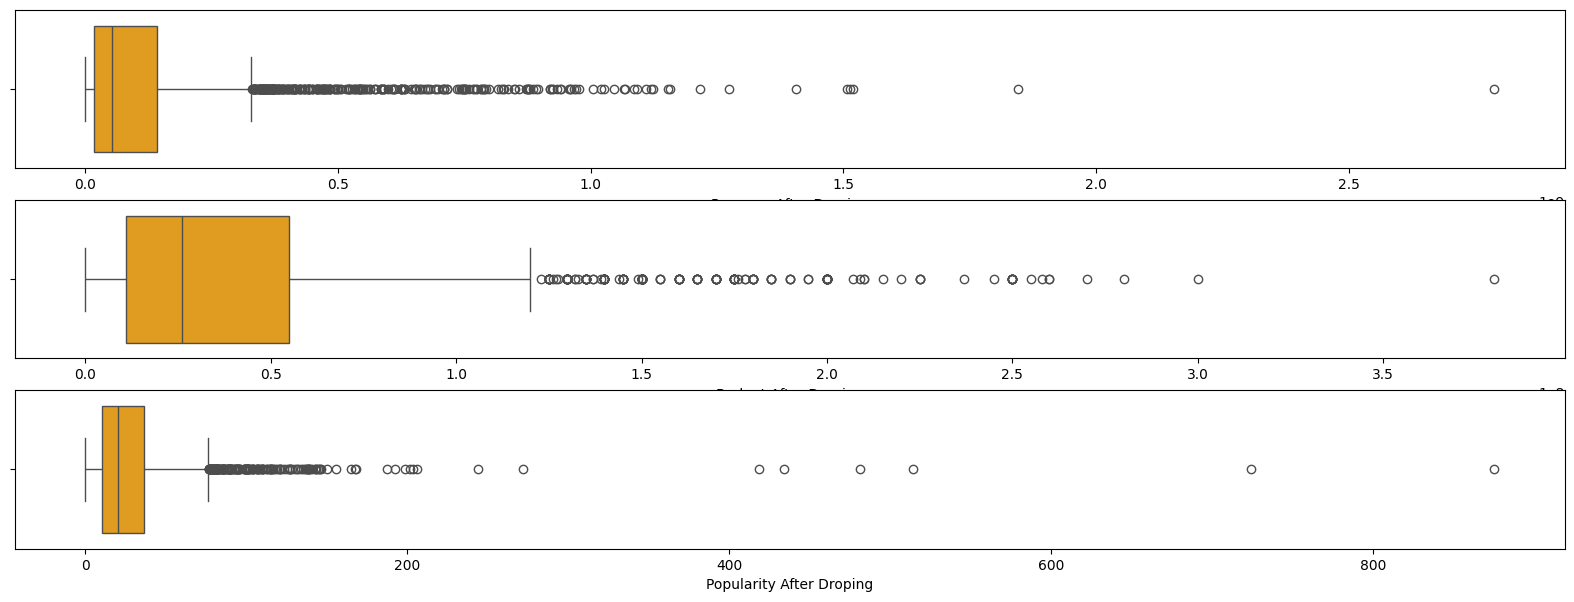

In [108]:

fig, axes = plt.subplots(3, 1, figsize=(20,7))

sns.boxplot(x = 'revenue', data = df,ax=axes[0],color='orange')
axes[0].set_xlabel('Revenue After Droping')

sns.boxplot(x = 'budget', data = df,ax=axes[1],color='orange')
axes[1].set_xlabel('Budget After Droping')

sns.boxplot(x = 'popularity', data = df,ax=axes[2],color='orange')
axes[2].set_xlabel('Popularity After Droping')


---

---


### 2.6 Movie Genres <a id="section_2_6"></a>
Why is movie genre important to us?

Finding a list of genres and grouping the data based on them helps us fill in missing data and return it to the data frame. In addition, we can use it to answer various questions.


In [109]:
genres_df=df[['id','genres']]  #New Dataframe
genres_df

id                                    genres
0      19995  action adventure fantasy science fiction
1        285                  adventure fantasy action
2     206647                    action adventure crime
3      49026               action crime drama thriller
4      49529          action adventure science fiction
...      ...                                       ...
4773    2292                                    comedy
4788     692                       horror comedy crime
4792   36095             crime horror mystery thriller
4796   14337            science fiction drama thriller
4798    9367                     action crime thriller

[3317 rows x 2 columns]

In [110]:
separated_genres_df=genres_df['genres'].str.split(" ", expand = True) # Put genres in each column separately. 
genres_df=pd.concat([genres_df,separated_genres_df],axis=1)   # concating seprated dataframe to last one.
genres_df.drop(columns='genres',inplace=True)      # Droping last column.
genres_df

id          0          1         2         3        4     5
0      19995     action  adventure   fantasy   science  fiction  None
1        285  adventure    fantasy    action      None     None  None
2     206647     action  adventure     crime      None     None  None
3      49026     action      crime     drama  thriller     None  None
4      49529     action  adventure   science   fiction     None  None
...      ...        ...        ...       ...       ...      ...   ...
4773    2292     comedy       None      None      None     None  None
4788     692     horror     comedy     crime      None     None  None
4792   36095      crime     horror   mystery  thriller     None  None
4796   14337    science    fiction     drama  thriller     None  None
4798    9367     action      crime  thriller      None     None  None

[3317 rows x 7 columns]

In [111]:
# List of movie genres

genres_list=[]
for i in range(len(genres_df)):
    for j in range(1,6):
        genres_list.append(genres_df.iloc[i,j]) 

genres_list = list(set(genres_list))   # deleting repeted genres
genres_list.remove(None)  # deleting none
genres_list

['action',
 'adventure',
 'western',
 'family',
 'fantasy',
 'animation',
 'documentary',
 'science',
 'crime',
 'horror',
 'foreign',
 'romance',
 'drama',
 'comedy',
 'thriller',
 'music',
 'mystery',
 'history',
 'war',
 'fiction']

---

### 2.7 Filling in Missing Values <a id="section_2_7"></a>

In this level, to fill in the revenue and budget column, first sort the movie genres to see which genres are most repeated.

In [112]:
# This function stores the number of movies made in each genre along with the name of that genre in a dataframe.

def common_genre(x):   # x: list of genres name
    common_genre=pd.DataFrame()
    common_genre.index=x
    common_genre['count']=None
    for i in range(len(x)):
        common_genre['count'][i]=len(df.loc[df['genres'].str.contains(x[i])])
    return common_genre

# ----------------------------------------------------------------------------------------
x=genres_list # list of genres name
common_genre_df=common_genre(x)  

C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\668404980.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  common_genre['count'][i]=len(df.loc[df['genres'].str.contains(x[i])])
C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_90

In [113]:
common_genre_df=common_genre_df.sort_values(['count'],ascending=False)
common_genre_df

count
drama        1496
comedy       1145
thriller      940
action        929
adventure     669
romance       590
crime         534
fiction       432
science       432
family        375
fantasy       345
horror        343
mystery       268
animation     188
history       148
war           119
music         118
western        59
documentary    40
foreign         3

In [114]:
genres_list=list(common_genre_df.index)  # we save in order from the most frequent to the least frequent
genres_list

['drama',
 'comedy',
 'thriller',
 'action',
 'adventure',
 'romance',
 'crime',
 'fiction',
 'science',
 'family',
 'fantasy',
 'horror',
 'mystery',
 'animation',
 'history',
 'war',
 'music',
 'western',
 'documentary',
 'foreign']

In [115]:
missing_values_df.head(2) # The missing values dataframe

budget                                    genres     id  \
83    27000000.0  action adventure science fiction romance  79698   
135  150000000.0                     drama horror thriller   7978   

    original_language original_title  popularity  \
83                 en     The Lovers    2.418535   
135                en    The Wolfman   21.214571   

                                  production_companies  \
83   [{"name": "corsan", "id": 7299}, {"name": "bli...   
135  [{"name": "universal pictures", "id": 33}, {"n...   

                                  production_countries  revenue  runtime  \
83   [{"iso_3166_1": "AU", "name": "Australia"}, {"...      NaN    109.0   
135  [{"iso_3166_1": "US", "name": "United States o...      NaN    102.0   

                             spoken_languages        title  vote_average  \
83   [{"iso_639_1": "en", "name": "english"}]   the lovers           4.8   
135  [{"iso_639_1": "en", "name": "english"}]  the wolfman           5.5   

     vote_count           director  release_Year  release_month  
83           34  roland joff\u00e9        2015.0            2.0  
135         549       joe johnston        2010.0            2.0

In [116]:
missing_values_df.shape

(1087, 17)

We start with the most numerous genre, drama, and fill in the missing data with the average of these categories.

In [117]:
# This function fills in missing values ​​in the revenue column

def filling_revenue_missing_values(x,missing_values_df,df): #x: list of genres name
    ff=pd.DataFrame()
    for i in x:
        ff = missing_values_df.loc[missing_values_df['genres'].str.contains(i)] 
        
        missing_values_df.drop(ff.index,inplace=True)  # Remove the columns we want to Fill them from missing data frame
        
        ff_mean=df.loc[df['genres'].str.contains(i)]['revenue'].mean()  # پیدا کردن میانگین ژانر i
        
        ff['revenue']=ff_mean  # Fill the column with the average of the previous row
        
        df=pd.concat([df,ff],axis=0)# Adding the data we filled to the original dataframe
        
    return df

In [118]:
df=filling_revenue_missing_values(genres_list,missing_values_df,df)

C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\1791562221.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_df.drop(ff.index,inplace=True)  # Remove the columns we want to Fill them from missing data frame
C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\1791562221.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff['revenue']=ff_mean  # Fill the column with the average of the previous row


We do the same process for the missing values ​​in the budget column.

In [119]:
missing_values_df=df[(df['budget'].isnull())]


In [120]:
df.dropna(subset='budget',axis=0,inplace=True)  

In [121]:
# This function fills in missing values ​​in the Budget column


def filling_budget_missing_values(x,missing_values_df,df): 
    ff=pd.DataFrame()
    for i in x:
        hh = missing_values_df.loc[missing_values_df['genres'].str.contains(i)] 
        
        missing_values_df.drop(hh.index,inplace=True)  
        
        hh_mean=df.loc[df['genres'].str.contains(i)]['budget'].mean()  
        
        hh['budget']=hh_mean  
        
        df=pd.concat([df,hh],axis=0) 
        
    return df



In [122]:
df=filling_budget_missing_values(genres_list,missing_values_df,df)

C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\38092597.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_df.drop(hh.index,inplace=True)
C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\38092597.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['budget']=hh_mean


---

In [123]:
total_null=df.isnull().sum()
total_null=total_null[total_null>0]
total_null

Series([], dtype: int64)

---

این دیکدینگ باید در مرحله اخر انجم بشه


In [ ]:

# Decoding the string using the codec registered for its encoding.

df['spoken_languages'] = df['spoken_languages'].apply(lambda x: x.encode('utf-8').decode('unicode_escape'))
df['production_companies']=df['production_companies'].apply(lambda x: x.encode('utf-8').decode('unicode_escape'))
df['director']=df['director'].apply(lambda x: x.encode('utf-8').decode('unicode_escape'))
#df['spoken_languages'] = df['spoken_languages'].apply(lambda x: x.encode('latin1').decode('utf-8'))



budget                       genres    id original_language  \
1987  24000000.0  fantasy animation adventure  4935                ja   

     original_title  popularity  \
1987        ハウルの動く城   49.549984   

                                   production_companies  \
1987  [{"name": "studio ghibli", "id": 10342}, {"nam...   

                         production_countries      revenue  runtime  \
1987  [{"iso_3166_1": "JP", "name": "Japan"}]  234710455.0    119.0   

                          spoken_languages                 title  \
1987  [{"iso_639_1": "ja", "name": "日本語"}]  howl's moving castle   

      vote_average  vote_count        director  release_Year  release_month  
1987           8.2        1991  hayao miyazaki        2004.0           11.0

---



### 2.8 Finding a List of Companies <a id="section_2_8"></a>

In [125]:
df_production_companies=df[['id','production_companies']]  # New dataframe
df_production_companies

id                               production_companies
0      19995  [{"name": "ingenious film partners", "id": 289...
1        285  [{"name": "walt disney pictures", "id": 2}, {"...
2     206647  [{"name": "columbia pictures", "id": 5}, {"nam...
3      49026  [{"name": "legendary pictures", "id": 923}, {"...
4      49529        [{"name": "walt disney pictures", "id": 2}]
...      ...                                                ...
4616   87943             [{"name": "vixen films", "id": 82784}]
4685  126141      [{"name": "les films du jeudi", "id": 54259}]
4711  178862           [{"name": "cherry on top", "id": 20757}]
4731   80215        [{"name": "blinkworks media", "id": 84489}]
4802   25975  [{"name": "rusty bear entertainment", "id": 87...

[4404 rows x 2 columns]

In [126]:
df_production_companies['production_companies']=df_production_companies['production_companies'].str.replace('[','')\
    .str.replace(']','').str.replace('{','')  # droping unusable charachter
separated_df_production_companies=df_production_companies['production_companies'].str.split("},", expand = True)  # droping the companies column and storing it in a new data frame

C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\2334287215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_production_companies['production_companies']=df_production_companies['production_companies'].str.replace('[','')\


In [127]:
df_production_companies=df_production_companies.drop(columns='production_companies')  # drop unusable column
df_production_companies=pd.concat([df_production_companies,separated_df_production_companies],axis=1)   


for i in range(0,26):
    df_production_companies[i]=df_production_companies[i].str.replace('}','') #Separating companies, placing each in separate columns

df_production_companies

id                                                0  \
0      19995     "name": "ingenious film partners", "id": 289   
1        285          "name": "walt disney pictures", "id": 2   
2     206647             "name": "columbia pictures", "id": 5   
3      49026          "name": "legendary pictures", "id": 923   
4      49529          "name": "walt disney pictures", "id": 2   
...      ...                                              ...   
4616   87943               "name": "vixen films", "id": 82784   
4685  126141        "name": "les films du jeudi", "id": 54259   
4711  178862             "name": "cherry on top", "id": 20757   
4731   80215          "name": "blinkworks media", "id": 84489   
4802   25975  "name": "rusty bear entertainment", "id": 87986   

                                                      1  \
0      "name": "twentieth century fox film corporati...   
1          "name": "jerry bruckheimer films", "id": 130   
2                         "name": "danjaq", "id": 10761   
3                    "name": "warner bros.", "id": 6194   
4                                                  None   
...                                                 ...   
4616                                               None   
4685                                               None   
4711                                               None   
4731                                               None   
4802            "name": "lucky crow films", "id": 87987   

                                                    2  \
0             "name": "dune entertainment", "id": 444   
1      "name": "second mate productions", "id": 19936   
2                          "name": "b24", "id": 69434   
3              "name": "dc entertainment", "id": 9993   
4                                                None   
...                                               ...   
4616                                             None   
4685                                             None   
4711                                             None   
4731                                             None   
4802                                             None   

                                                   3     4     5     6     7  \
0      "name": "lightstorm entertainment", "id": 574  None  None  None  None   
1                                               None  None  None  None  None   
2                                               None  None  None  None  None   
3                      "name": "syncopy", "id": 9996  None  None  None  None   
4                                               None  None  None  None  None   
...                                              ...   ...   ...   ...   ...   
4616                                            None  None  None  None  None   
4685                                            None  None  None  None  None   
4711                                            None  None  None  None  None   
4731                                            None  None  None  None  None   
4802                                            None  None  None  None  None   

         8  ...    16    17    18    19    20    21    22    23    24    25  
0     None  ...  None  None  None  None  None  None  None  None  None  None  
1     None  ...  None  None  None  None  None  None  None  None  None  None  
2     None  ...  None  None  None  None  None  None  None  None  None  None  
3     None  ...  None  None  None  None  None  None  None  None  None  None  
4     None  ...  None  None  None  None  None  None  None  None  None  None  
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
4616  None  ...  None  None  None  None  None  None  None  None  None  None  
4685  None  ...  None  None  None  None  None  None  None  None  None  None  
4711  None  ...  None  None  None  None  None  None  None  None  None  None  
4731  None  ...  None  None  None  None  None  None  None  None  None  None  
4802  None  ... 

In [128]:
df_production_companies_new=df_production_companies['id']  # Create a new data frame by parsing each company's ID from its name

# delet unusable charachter
for j in range(0,26):
    aa=df_production_companies[j].str.split('", "',expand=True)
    aa[0]=aa[0].str.replace('"name":','').str.replace('"','')
    aa[1]=aa[1].str.replace('id":','')
    
    df_production_companies_new=pd.concat([df_production_companies_new,aa],axis=1)



df_production_companies_new.columns=[*range(0,53)]   # changing column name
df_production_companies_new.rename({0: 'id'}, inplace=True)  # id column

df_production_companies_new

0                          1       2   \
id     19995    ingenious film partners     289   
1        285       walt disney pictures       2   
2     206647          columbia pictures       5   
3      49026         legendary pictures     923   
4      49529       walt disney pictures       2   
...      ...                        ...     ...   
4616   87943                vixen films   82784   
4685  126141         les films du jeudi   54259   
4711  178862              cherry on top   20757   
4731   80215           blinkworks media   84489   
4802   25975   rusty bear entertainment   87986   

                                            3       4   \
id      twentieth century fox film corporation     306   
1                      jerry bruckheimer films     130   
2                                       danjaq   10761   
3                                 warner bros.    6194   
4                                         None    None   
...                                        ...     ...   
4616                                      None    None   
4685                                      None    None   
4711                                      None    None   
4731                                      None    None   
4802                          lucky crow films   87987   

                             5       6                           7      8   \
id           dune entertainment     444    lightstorm entertainment    574   
1       second mate productions   19936                        None   None   
2                           b24   69434                        None   None   
3              dc entertainment    9993                     syncopy   9996   
4                          None    None                        None   None   
...                         ...     ...                         ...    ...   
4616                       None    None                        None   None   
4685                       None    None                        None   None   
4711                       None    None                        None   None   
4731                       None    None                        None   None   
4802                       None    None                        None   None   

        9   ...    43    44    45    46    47    48    49    50    51    52  
id    None  ...  None  None  None  None  None  None  None  None  None  None  
1     None  ...  None  None  None  None  None  None  None  None  None  None  
2     None  ...  None  None  None  None  None  None  None  None  None  None  
3     None  ...  None  None  None  None  None  None  None  None  None  None  
4     None  ...  None  None  None  None  None  None  None  None  None  None  
...    ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
4616  None  ...  None  None  None  None  None  None  None  None  None  None  
4685  None  ...  None  None  None  None  None  None  None  None  None  None  
4711  None  ...  None  None  None  None  None  None  None  None  None  None  
4731  None  ...  None  None  None  None  None  None  None  None  None  None  
4802  None  ...  None  None  None  None  None  None  None  None  None  None  

[4404 rows x 53 columns]

In [129]:
#This function extracts unique values ​​from the data frame in the previous code and outputs a set of company names.

def find_uniq_company():
    company_set=set()
    for i in range(1,53,2):
        x=df_production_companies_new[i].unique()
        company_set=company_set.union(x)
    return company_set


company_set=find_uniq_company()  
company_list=list(company_set)   #  convert set to list
company_list = list(map(str, company_list)) # convert list member to string
company_list=[x.strip() for x in company_list]  # removing space
company_list

['volcano films',
 'limelight fund',
 'woodfall film productions',
 'bayahibe films ltd.',
 'zentropa international köln',
 'burn later productions',
 'better wide',
 'det danske filminstitut',
 'sundial pictures',
 'red chair films',
 'vega film',
 'cinema line film corporation',
 'goldsmith-thomas productions',
 'lyrick studios',
 'soprofilms',
 'teleclub ag',
 'translux',
 'quickfire films',
 'norddeutscher rundfunk (ndr)',
 'samuel goldwyn films',
 'earth canada productions',
 'plan b entertainment',
 'melvin frank production',
 'ast studios',
 'laura ziskin productions',
 'fonds sud cinéma',
 'forecast pictures',
 'douglas/reuther productions',
 'hanmac films',
 'b.sting entertainment',
 'totally independent',
 'gaumont',
 'insight film releasing',
 'the alfred shay company inc.',
 'underwater productions',
 'umedia',
 'berrick filmproduktion',
 'survivor productions',
 'greenlit rights',
 'ilion animation studios',
 'internationale filmproduktion',
 'madacy entertainment',
 'lone

---


### 2.9 Film Language <a id="section_2_9"></a>

The original language column refers to the language in which the film was made.

The spoken_languages ​​column corresponds to the languages ​​into which the film was dubbed.

In [130]:
original_language_list=list(df['original_language'].unique()) # List of original languages
original_language_list

['en',
 'ja',
 'fr',
 'zh',
 'ko',
 'te',
 'ru',
 'de',
 'cn',
 'es',
 'it',
 'nl',
 'th',
 'da',
 'xx',
 'hi',
 'is',
 'nb',
 'pt',
 'af',
 'pl',
 'he',
 'id',
 'ro',
 'no',
 'fa',
 'sv',
 'tr',
 'ps',
 'el',
 'ta',
 'ar',
 'ky',
 'sl']

Film dubbing languages

In [131]:
spoken_language=df[['id','spoken_languages']] # New dataframe
spoken_language

id                                   spoken_languages
0      19995  [{"iso_639_1": "en", "name": "english"}, {"iso...
1        285           [{"iso_639_1": "en", "name": "english"}]
2     206647  [{"iso_639_1": "fr", "name": "français"}, {"is...
3      49026           [{"iso_639_1": "en", "name": "english"}]
4      49529           [{"iso_639_1": "en", "name": "english"}]
...      ...                                                ...
4616   87943           [{"iso_639_1": "en", "name": "english"}]
4685  126141          [{"iso_639_1": "fr", "name": "français"}]
4711  178862           [{"iso_639_1": "en", "name": "english"}]
4731   80215           [{"iso_639_1": "en", "name": "english"}]
4802   25975           [{"iso_639_1": "en", "name": "english"}]

[4404 rows x 2 columns]

In [132]:
spoken_language['spoken_languages']=spoken_language['spoken_languages'].str.replace('[','').str.replace(']','').str.replace('{','')
spoken_language_separated=spoken_language['spoken_languages'].str.split("},", expand = True) 


for i in range(0,8):
    spoken_language_separated[i]=spoken_language_separated[i].str.replace('}','') 

C:\Users\Zahra Rabiee\AppData\Local\Temp\ipykernel_9056\3474347199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spoken_language['spoken_languages']=spoken_language['spoken_languages'].str.replace('[','').str.replace(']','').str.replace('{','')


In [133]:
spoken_language_new=pd.DataFrame() 
spoken_language_new=spoken_language['id']


for j in range(0,8):
    cc=spoken_language_separated[j].str.split('", "',expand=True)
    cc[0]=cc[0].str.replace('"iso_639_1":','').str.replace('"','')
    cc[1]=cc[1].str.replace('name": "','').str.replace('"','')
    
    spoken_language_new=pd.concat([spoken_language_new,cc],axis=1)


spoken_language_new.columns=[*range(0,17)]  
spoken_language_new.rename(columns={0: 'id'}, inplace=True) 
spoken_language_new

id    1         2     3        4     5        6     7         8  \
0      19995   en   english    es  español  None     None  None      None   
1        285   en   english  None     None  None     None  None      None   
2     206647   fr  français    en  english    es  español    it  italiano   
3      49026   en   english  None     None  None     None  None      None   
4      49529   en   english  None     None  None     None  None      None   
...      ...  ...       ...   ...      ...   ...      ...   ...       ...   
4616   87943   en   english  None     None  None     None  None      None   
4685  126141   fr  français  None     None  None     None  None      None   
4711  178862   en   english  None     None  None     None  None      None   
4731   80215   en   english  None     None  None     None  None      None   
4802   25975   en   english  None     None  None     None  None      None   

         9       10    11    12    13    14    15    16  
0     None     None  None  None  None  None  None  None  
1     None     None  None  None  None  None  None  None  
2       de  deutsch  None  None  None  None  None  None  
3     None     None  None  None  None  None  None  None  
4     None     None  None  None  None  None  None  None  
...    ...      ...   ...   ...   ...   ...   ...   ...  
4616  None     None  None  None  None  None  None  None  
4685  None     None  None  None  None  None  None  None  
4711  None     None  None  None  None  None  None  None  
4731  None     None  None  None  None  None  None  None  
4802  None     None  None  None  None  None  None  None  

[4404 rows x 17 columns]

In [134]:
#This function extracts unique values ​​from the data frame in the previous code and outputs a set of language names.


def find_uniq_language():
    language_set=set()
    for i in range(2,18,2):
        x=spoken_language_new[i].unique()
        language_set=language_set.union(x)
    return language_set



language_set=find_uniq_language() 
language_set.remove('') 
language_set.remove(None) 
language_set

{'??????',
 'afrikaans',
 'bahasa indonesia',
 'bamanankan',
 'bosanski',
 'català',
 'cymraeg',
 'dansk',
 'deutsch',
 'eesti',
 'english',
 'español',
 'esperanto',
 'français',
 'gaeilge',
 'galego',
 'hrvatski',
 'isizulu',
 'italiano',
 'kiswahili',
 'latin',
 'magyar',
 'nederlands',
 'no language',
 'norsk',
 'polski',
 'português',
 'pусский',
 'română',
 'shqip',
 'slovenčina',
 'slovenščina',
 'somali',
 'srpski',
 'suomi',
 'svenska',
 'tiếng việt',
 'türkçe',
 'wolof',
 'Íslenska',
 'Český',
 'ελληνικά',
 'Український',
 'български език',
 'қазақ',
 'עִבְרִית',
 'اردو',
 'العربية',
 'فارسی',
 'پښتو',
 'हिन्दी',
 'বাংলা',
 'ਪੰਜਾਬੀ',
 'தமிழ்',
 'తెలుగు',
 'ภาษาไทย',
 'ქართული',
 '广州话 / 廣州話',
 '日本語',
 '普通话',
 '한국어/조선말'}

---

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"><font face="vazir" size=4 color=red> پیدا کردن لیست نام کارگردان‌ها</font></p>



### 2.10 Directors name <a id="section_2_10"></a>

In [135]:
directors_name_list=df['director'].unique()
directors_name_list

array(['james cameron', 'gore verbinski', 'sam mendes', ...,
       'deborah anderson', 'lisanne pajot', 'brian herzlinger'],
      dtype=object)

Finally, we create a new column called profit that stores the profit earned from the sale of each movie.

In [136]:



df['profit']=df['revenue']-df['budget']

---